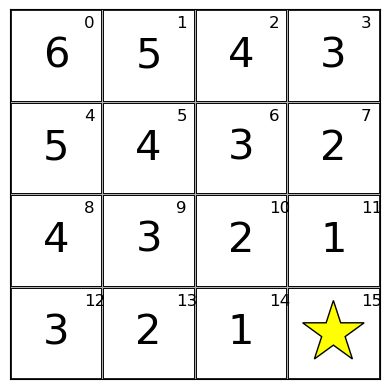

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon

# Crear la figura y el eje
fig, ax = plt.subplots()

# Configurar el tamaño del gráfico
ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

# Desactivar los ejes
ax.set_xticks(np.arange(0, 5, 1))
ax.set_yticks(np.arange(0, 5, 1))
ax.grid(True)
ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

# Diccionario para almacenar los números grandes y sus posiciones
numeros_grandes = {
    (0, 0): 6,  # Columna 0, fila 0
    (1, 0): 5,  # Columna 1, fila 0
    (0, 1): 5,  # Columna 0, fila 1
    (2, 0): 4,  # Columna 2, fila 0
    (1, 1): 4,  # Columna 1, fila 2
    (0, 2): 4,  # Columna 0, fila 2
    (3, 0): 3,  # Columna 3, fila 0
    (2, 1): 3,  # Columna 2, fila 2
    (1, 2): 3,  # Columna 1, fila 2
    (0, 3): 3,  # Columna 0, fila 3
    (3, 1): 2,  # Columna 2, fila 2
    (2, 2): 2,  # Columna 1, fila 2
    (1, 3): 2,   # Columna 0, fila 3
    (3, 2): 1,  # Columna 1, fila 2
    (2, 3): 1   # Columna 0, fila 3
}

# Función para dibujar una estrella de 5 puntas
def dibujar_estrella(x, y, size=0.4, color='yellow', edgecolor='black'):
    # Coordenadas para una estrella de 5 puntas
    puntos = np.array([
        [0, size], [0.2245*size, 0.309*size], [0.951*size, 0.309*size],
        [0.363*size, -0.118*size], [0.588*size, -0.809*size],
        [0, -0.382*size], [-0.588*size, -0.809*size], [-0.363*size, -0.118*size],
        [-0.951*size, 0.309*size], [-0.2245*size, 0.309*size]
    ])
    
    # Desplazar la estrella al centro de la celda
    puntos[:, 0] += x
    puntos[:, 1] += y

    estrella = Polygon(puntos, closed=True, fill=True, edgecolor=edgecolor, facecolor=color)
    ax.add_patch(estrella)

# Dibujar la cuadrícula 4x4
for i in range(4):
    for j in range(4):
        # Dibujar el borde de cada celda
        rect = plt.Rectangle((i, 3 - j), 1, 1, fill=False, edgecolor='black', linewidth=2)
        ax.add_patch(rect)
        
        # Dibujar una estrella en la fila 3, columna 3
        if i == 3 and j == 3:
            dibujar_estrella(i + 0.5, 3 - j + 0.5, size=0.35)
        # Colocar números grandes si la celda está en el diccionario
        elif (i, j) in numeros_grandes:
            ax.text(i + 0.5, 3 - j + 0.5, str(numeros_grandes[(i, j)]), fontsize=30, ha='center', va='center')
        
        # Colocar los números pequeños en la esquina superior derecha de cada casilla
        ax.text(i + 0.8, 3 - j + 0.8, str(j * 4 + i), fontsize=12)

# Ajustar el gráfico
plt.gca().set_aspect('equal', adjustable='box')
plt.show()
